In [ ]:

# Company    : Stevens Institute of Technology
# Project    : HW05
# Purpose    : To perform the classification model given the cart methodology given the database called breast-cancer-wisconsin.data.csv
# First Name : Spruha
# Last Name  : Paradkar
# Id		 : 10470967
# Date       : 10/27/2023
# Comments   : I pledge my honor that I have abided by the Stevens Honor System


In [215]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [216]:
print('Loading the breast cancer dataset')
breastCancer = pd.read_csv('/Users/spruhap/Desktop/School/Fall23/CS513/breast-cancer-wisconsin.csv')
breastCancer.head(10)

Loading the breast cancer dataset


,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [217]:
print('The length of the database before dropping all the missing values')
print(len(breastCancer))

The length of the database before dropping all the missing values
699


In [218]:
breastCancer = breastCancer.drop(breastCancer.loc[breastCancer['F6']== '?'].index)
print('The length of the database after dropping all the missing values')
print(len(breastCancer))

The length of the database after dropping all the missing values
683


In [219]:
print("The breast cancer database after dropping all the missing values")
breastCancer.head(10)

The breast cancer database after dropping all the missing values


,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [220]:
print('Dropping the Class and Sample field')
# Splitting the dataset
breastCancer = breastCancer.astype('category')
attributes = breastCancer.drop(columns = ['Class', 'Sample'])
attributes.head(10)

Dropping the Class and Sample field


,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
5,8,10,10,8,7,10,9,7,1
6,1,1,1,1,2,10,3,1,1
7,2,1,2,1,2,1,3,1,1
8,2,1,1,1,2,1,1,1,5
9,4,2,1,1,2,1,2,1,1


In [221]:
print('Creating a data frame called target for the Class variable')
target = breastCancer['Class'] # target variable
target.head(10)

Creating a data frame called target for the Class variable


0    2
1    2
2    2
3    2
4    2
5    4
6    2
7    2
8    2
9    2
Name: Class, dtype: category
Categories (2, int64): [2, 4]

In [222]:
#RANDOM_STATE helps to keep the data consistent -> it keeps the values consistent when you run the code again
print('Dividing the data into test and train data given the 30/70 split ratio')
attribute_train, attribute_test, target_train,target_test  = train_test_split(attributes, target,test_size = 0.3, random_state = 87, shuffle = True)

Dividing the data into test and train data given the 30/70 split ratio


Accuracy: 0.9414634146341463


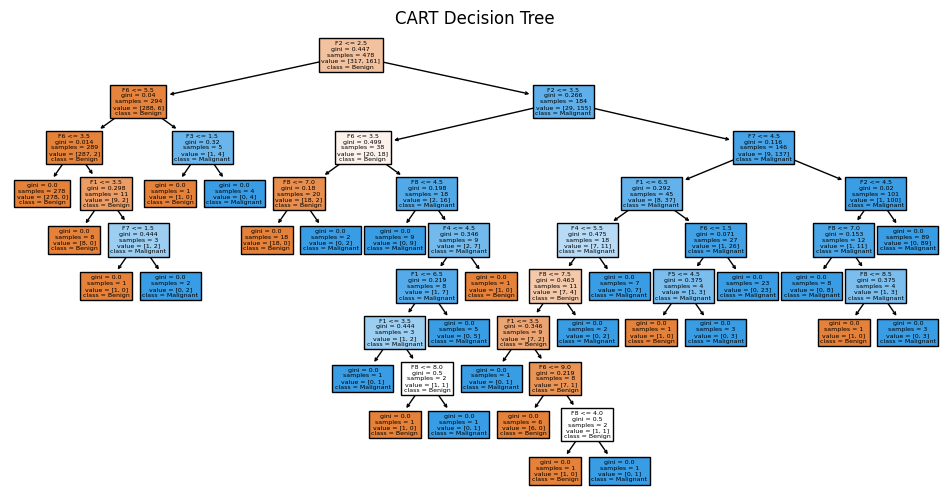

In [223]:

cart_model = DecisionTreeClassifier()
cart_model = cart_model.fit(attribute_train, target_train)
target_pred = cart_model.predict(attribute_test);
print("Accuracy:",accuracy_score(target_test, target_pred)) 
plt.figure(figsize=(12, 6))
plot_tree(cart_model, feature_names=attributes.columns, class_names=['Benign', 'Malignant'], filled=True)
plt.title("CART Decision Tree")
plt.show()